In [1]:
import sys
import os

# Adds the root directory (one level up from notebooks/) to sys.path
sys.path.append(os.path.abspath(".."))


In [2]:
from src.data_loader import load_news_data
df = load_news_data()

✅ Total: 1407328 | Valid dates: 55987


as you can see only 55,987 dates are valid which is abnormal and the case might be as we are working with real-world data, date columns often contain values in a variety of formats—or even include messy, invalid entries. Standardizing these dates is essential for reliable analysis, filtering, and time series operations.

In [3]:
df['date'] = df['date'].astype(str).str.strip()


Data often has extra spaces (e.g., ' 2025-05-28 '), which can mess up date parsing and comparisons.
so By cleaning the column like this, you reduce errors in later processing—especially when converting to datetime.
so the method .str.strip()
Removes any leading or trailing whitespace (spaces, tabs, newlines, etc.) from each string in the column.

In [4]:
import pandas as pd
from src.data_cleaning import parse_dates_column



# Parse dates (modular)
df = parse_dates_column(df, 'date', new_column='parsed_date')





### What Does This Module Do?
Standardizes a date column in your DataFrame, handling mixed or inconsistent formats.

Uses a two-step parsing approach for maximum robustness:

First pass: Attempts to parse dates with pandas.to_datetime() (fast and vectorized).

Second pass: Applies a custom robust_parse() function, leveraging dateutil.parser to parse entries that failed the first step (e.g., unusual, non-standard formats).

Returns a new column (parsed_date by default) containing clean, standardized datetime values, or NaT for truly invalid rows.

In [5]:
print("Total rows:", len(df))
print("Valid dates:", df['date'].notna().sum())
print("Null dates:", df['date'].isna().sum())

# Optional: Check what % are valid
print("Valid %:", df['date'].notna().mean() * 100)


Total rows: 1407328
Valid dates: 1407328
Null dates: 0
Valid %: 100.0


SO our method works well with 0 null dates.it worked!

In [6]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,parsed_date
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,2020-06-05
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,2020-06-03
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,2020-05-26
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,2020-05-22
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,2020-05-22


In [7]:

# Add character count and word count for each headline
df['headline_length'] = df['headline'].astype(str).str.len()
df['headline_word_count'] = df['headline'].astype(str).str.split().apply(len)


In [8]:

print("Character Length Statistics:")
print(df['headline_length'].describe())

print("\nWord Count Statistics:")
print(df['headline_word_count'].describe())


Character Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Word Count Statistics:
count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_word_count, dtype: float64


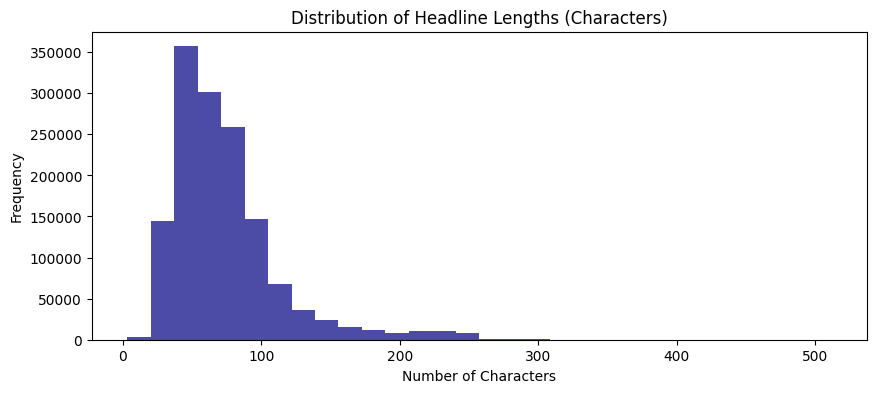

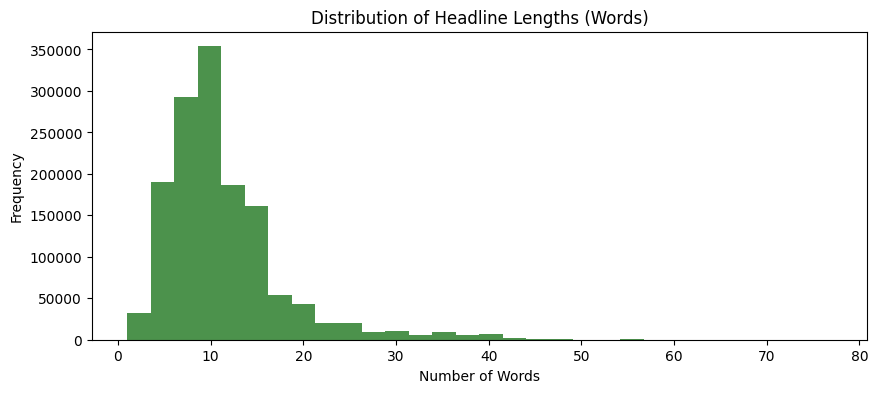

In [9]:
from src.visualization import plot_histogram

# Headline character length
plot_histogram(df, 'headline_length', color='navy', title='Distribution of Headline Lengths (Characters)', xlabel='Number of Characters')

# Headline word count
plot_histogram(df, 'headline_word_count', color='darkgreen', title='Distribution of Headline Lengths (Words)', xlabel='Number of Words')



Interpretation
X-axis (Number of Words):
Shows the length of headlines in terms of word count, ranging from 0 to 80 words.

Y-axis (Frequency):
Indicates how many headlines fall into each word count category.

Key Observations:
Most Headlines Are Short:

The distribution is heavily right-skewed (long tail to the right).

Majority of headlines have between 5 and 15 words.

The most common headline length appears to be around 10 words (the highest bar/frequency).

Few Very Long Headlines:

Headline counts rapidly drop off after about 15–20 words.

Very few headlines have more than 30 words.

Beyond 40 words, headlines are extremely rare.

Practical Insight:

Shorter headlines are far more common—likely because concise headlines are more effective and preferred in journalism and media.

Outliers exist (some headlines have 50–80 words), but these are very rare and may be errors or special cases.



In [10]:
from src.statistics import most_active_publishers
print(most_active_publishers(df,'publisher', 10))


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [11]:
import pandas as pd
from src.statistics import mean_median_mode_stats



stats_dict = mean_median_mode_stats(df, 'headline_word_count')
print(f"Mean: {stats_dict['mean']:.2f}")
print(f"Median: {stats_dict['median']}")
print(f"Mode: {stats_dict['mode']}")


Mean: 11.42
Median: 10.0
Mode: 7


The distribution of headline lengths (in words) is highly concentrated between 5 and 15 words, peaking near 10 words. Very long headlines are rare, and the overall trend shows that brevity is the norm in headline writing.

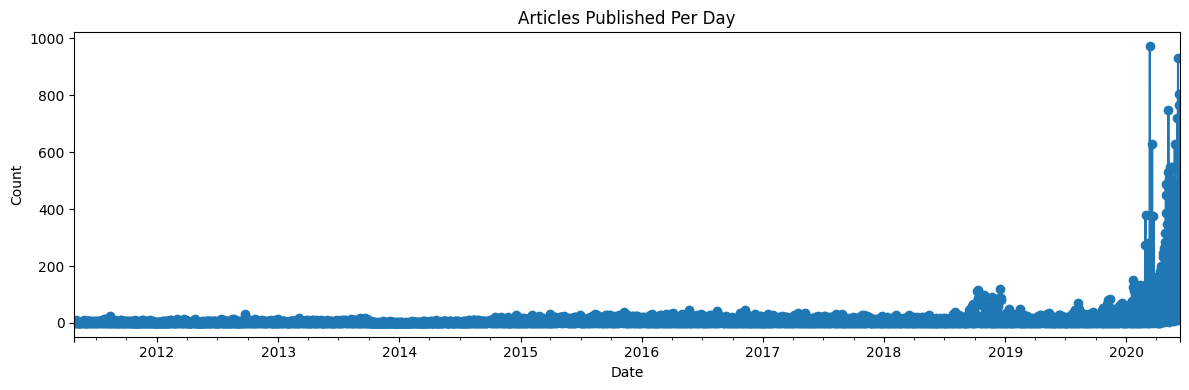

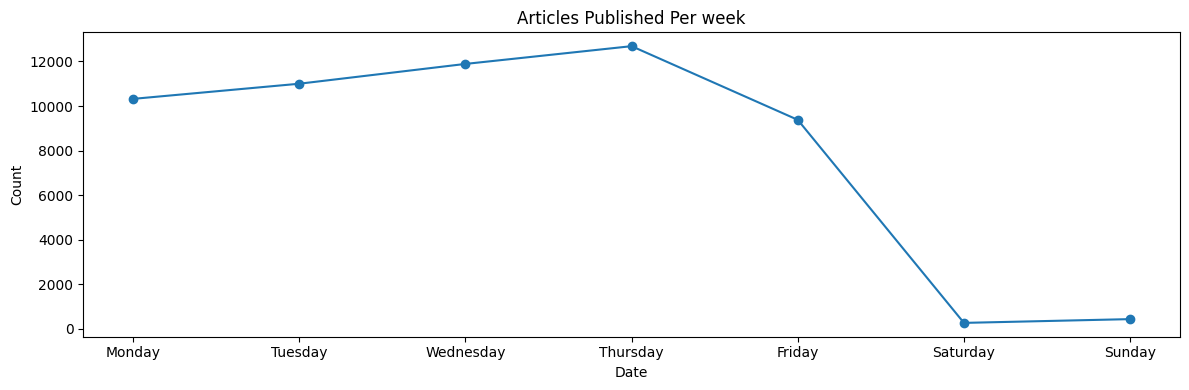

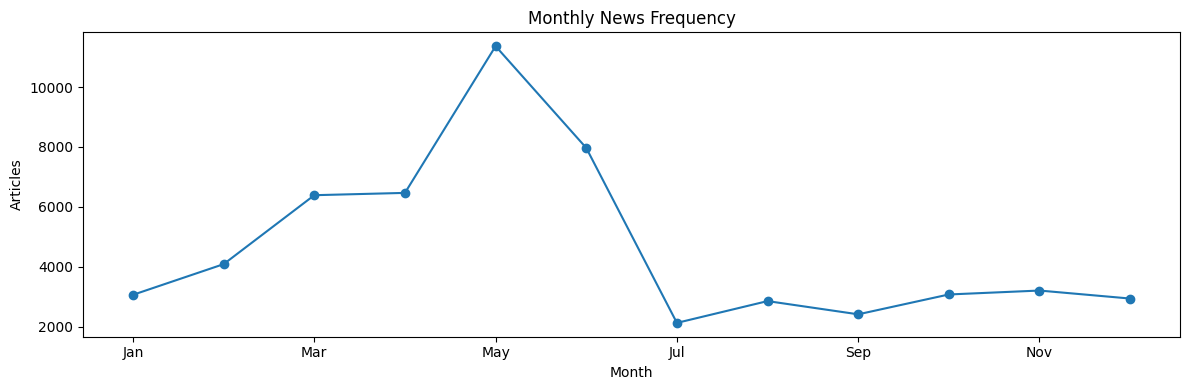

In [12]:
from src.statistics import article_counts_by_period, article_counts_by_weekday,article_counts_by_calendar_month
from src.visualization import plot_time_trend

# Trend by day
daily_counts = article_counts_by_period(df, period='D')


monthly_counts = article_counts_by_calendar_month(df, date_col='date')



# By weekday
weekday_counts = article_counts_by_weekday(df)

plot_time_trend(
    daily_counts, 
    title="Articles Published Per Day", 
    xlabel="Date", 
    ylabel="Count"
)
plot_time_trend(
    weekday_counts, 
    title="Articles Published Per week", 
    xlabel="Date", 
    ylabel="Count"
)

plot_time_trend(
    monthly_counts, 
    title="Monthly News Frequency", 
    xlabel="Month", 
    ylabel="Articles"
)


more news is published in 2020 and from monday to frieday while saturday and suday shows less publication 



in months There is a clear seasonal pattern in news publication.

January to June:

The number of articles steadily increases, with a rapid surge especially from March to May.

May is the peak month, with the highest number of articles—over 11,000.

June to July:

There is a sharp drop after June, reaching the lowest point in July.

July to December:

After July, the frequency remains relatively low and stable with minor fluctuations.

Slight increases are observed in the last quarter, but not close to the earlier peak.

Most Active Period:

Spring to early Summer (March–June) is the most active period for article publication.

May stands out as the most news-intensive month.

Least Active Period:

July is the lowest point, possibly due to holidays, vacation periods, or industry slowdowns.

The rest of the year (August–December) remains consistently lower than the first half.

In [ ]:
from src.text_analysis import add_topic_tags, TOPIC_KEYWORDS

df_tagged = add_topic_tags(df, "headline", TOPIC_KEYWORDS)

# Count the number of articles per topic
topic_counts = df_tagged['topic'].value_counts()
print(topic_counts)

# Optional: Plot
from src.visualization import plot_bar
plot_bar(
    topic_counts,
    title="News Headlines by Topic",
    xlabel="Topic",
    ylabel="Number of Articles",
    color="teal"
)


In [ ]:
import talib
print(talib.__version__)


0.6.3
